## AB-тест по скриптам tm_script_halykmarket_preapproved и tm_script_halykmarket_preapproved_new.

#### Данные были выгружены за период с 01.08.2024 по 22.08.2024

In [113]:
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, mannwhitneyu, norm
from statsmodels.stats.power import TTestIndPower

from math import sqrt

In [114]:
data = pd.read_csv('C:/Users/Lenovo v15/Downloads/ABtest_halykmarket.csv')

In [115]:
data.head(100)

,username,btype,date,promis,group
0,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-01,11.1967,A
1,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-02,9.9204,A
2,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-03,10.6955,A
3,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-04,9.6491,A
4,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-05,9.3434,A
5,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-06,10.8816,A
6,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-07,11.7554,A
7,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-08,11.7519,A
8,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-09,9.3786,A
9,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-10,11.2689,A


In [116]:
data.shape

(42, 5)

 ### 

### Проверка на А/А тест

In [117]:
data_a = data[data['group'] == 'A']

In [118]:
data_a.head(100)

,username,btype,date,promis,group
0,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-01,11.1967,A
1,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-02,9.9204,A
2,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-03,10.6955,A
3,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-04,9.6491,A
4,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-05,9.3434,A
5,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-06,10.8816,A
6,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-07,11.7554,A
7,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-08,11.7519,A
8,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-09,9.3786,A
9,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-10,11.2689,A


In [119]:
data_aa = pd.concat([data_a, data_a.replace(['A'], 'B')], axis = 0)

In [120]:
data_aa.head(100)

,username,btype,date,promis,group
0,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-01,11.1967,A
1,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-02,9.9204,A
2,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-03,10.6955,A
3,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-04,9.6491,A
4,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-05,9.3434,A
5,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-06,10.8816,A
6,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-07,11.7554,A
7,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-08,11.7519,A
8,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-09,9.3786,A
9,user_halyk_market,tm_script_halykmarket_preapproved,2024-08-10,11.2689,A


In [121]:
data['group'].value_counts()

group
A    21
B    21
Name: count, dtype: int64

##### Формула для расчета размера выборки

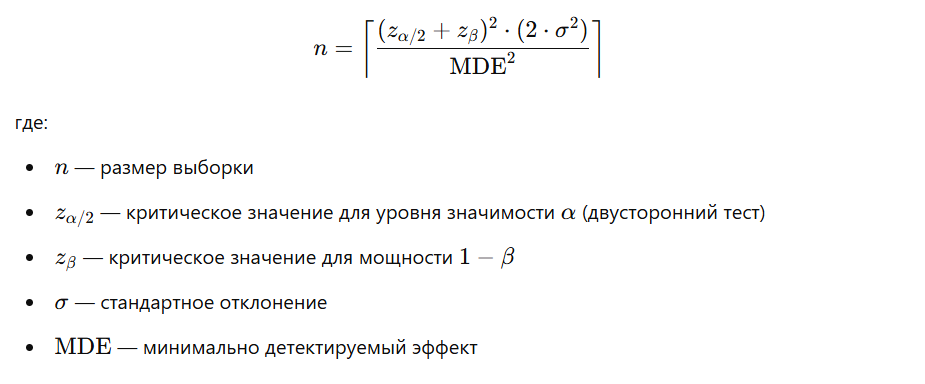

In [122]:
def get_sample_size_abs(mde, std, alpha = 0.05, beta = 0.2):
    t_alpha = norm.ppf(1 - alpha / 2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    z_scores_sum_squared = (t_alpha + t_beta) ** 2
    sample_size = int(
        np.ceil(
            z_scores_sum_squared * (2 * std ** 2) / (mde ** 2)
        )
    )
    return sample_size

In [123]:
def get_sample_size_arb(mu, std, eff=1.01, alpha=0.05, beta=0.2):
    epsilon = (eff - 1) * mu

    return get_sample_size_abs(epsilon, std = std, alpha = alpha, beta = beta)

def check_ttest(a, b, alpha = 0.05):
    """Тест Стьюдента. Возвращает 1, если отличия значимы."""
    _, pvalue = ttest_ind(a, b)
    return int(pvalue < alpha), pvalue

In [124]:
def get_minimal_determinable_effect(std, sample_size, alpha = 0.05, beta = 0.2):
    t_alpha = norm.ppf(1 - alpha / 2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    disp_sum_sqrt = (2 * (std ** 2)) ** 0.5
    mde = (t_alpha + t_beta) * disp_sum_sqrt / np.sqrt(sample_size)
    return mde

In [125]:
alpha = 0.05
beta = 0.2

mean = data_aa[data_aa['group'] == 'A']['promis'].mean()

std = data_aa[data_aa['group'] == 'A']['promis'].std()

In [126]:
mde = get_minimal_determinable_effect(std, data_aa.shape[0] // 2, alpha = alpha, beta = beta)
print(f'mde = {np.round(mde, 3)}')
print(f'mde = {np.round(mde / mean * 100, 3)}%')

mde = 0.703
mde = 6.763%


In [127]:
check_ttest(data_aa[data_aa['group'] == 'A']['promis'], data_aa[data_aa['group'] == 'B']['promis'], alpha=0.05)

(0, 1.0)

### 

### Проверка на А/B тест

In [128]:
def get_sample_size_abs(mde, std, alpha = 0.05, beta = 0.2):
    t_alpha = norm.ppf(1 - alpha / 2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    z_scores_sum_squared = (t_alpha + t_beta) ** 2
    sample_size = int(
        np.ceil(
            z_scores_sum_squared * (2 * std ** 2) / (mde ** 2)
        )
    )
    return sample_size

In [129]:
def get_sample_size_arb(mu, std, eff=1.01, alpha=0.05, beta=0.2):
    epsilon = (eff - 1) * mu

    return get_sample_size_abs(epsilon, std = std, alpha = alpha, beta = beta)

def check_ttest(a, b, alpha = 0.05):
    """Тест Стьюдента. Возвращает 1, если отличия значимы."""
    _, pvalue = ttest_ind(a, b)
    return int(pvalue < alpha), pvalue

In [130]:
def get_minimal_determinable_effect(std, sample_size, alpha = 0.05, beta = 0.2):
    t_alpha = norm.ppf(1 - alpha / 2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    disp_sum_sqrt = (2 * (std ** 2)) ** 0.5
    mde = (t_alpha + t_beta) * disp_sum_sqrt / np.sqrt(sample_size)
    return mde

In [131]:
alpha = 0.05
beta = 0.2

mean = data[data['group'] == 'A']['promis'].mean()

std = data[data['group'] == 'A']['promis'].std()

In [132]:
mde = get_minimal_determinable_effect(std, data.shape[0] // 2, alpha = alpha, beta = beta)
print(f'mde = {np.round(mde, 3)}')
print(f'mde = {np.round(mde / mean * 100, 3)}%')

mde = 0.703
mde = 6.763%


In [139]:
print(check_ttest(data[data['group'] == 'A']['promis'], data[data['group'] == 'B']['promis'], alpha=0.05))
print()

if p_value < 0.05:
    print('Наблюдаемое различие между скриптами статистически значимо.')
else:
    print('Различия между скриптами не являются статистически значимыми.')

(1, 0.000162903487912755)

Наблюдаемое различие между скриптами статистически значимо.
